<a href="https://colab.research.google.com/github/felipehenao1/felipehenao1/blob/main/Proyecto_deserci%C3%B3n_laboral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Reducir la tasa de deserción laboral en la empresa.

* Comprender y cuantificar el impacto de la deserción desde una perspectiva empresarial.

  * ¿Cuál es la tasa de deserción actual?
  * ¿Existe un perfil de empleado con mayor probabilidad de renunciar?
  * ¿Cuál es el impacto económico de este problema en nuestra organización?
  * ¿Cuántos recursos económicos podríamos ahorrar si logramos retener a nuestros empleados?
* Desarrollar un sistema automatizado de Machine Learning para identificar a los empleados en mayor riesgo de renunciar.

* Comunicar de manera efectiva los resultados al equipo directivo.

### CARGA DE LIBRERIAS

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import ceil

### CARGA DE LOS DATOS

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

## BUSINESS ANALYTICS

In [51]:
df.size

45570

In [52]:
df.shape

(1470, 31)

In [53]:
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

In [54]:
df.dtypes

edad                          int64
abandono                     object
viajes                       object
departamento                 object
distancia_casa                int64
educacion                    object
carrera                      object
empleados                     int64
satisfaccion_entorno         object
sexo                        float64
implicacion                  object
nivel_laboral                 int64
puesto                       object
satisfaccion_trabajo         object
estado_civil                 object
salario_mes                   int64
num_empresas_anteriores       int64
mayor_edad                   object
horas_extra                  object
incremento_salario_porc       int64
evaluacion                   object
satisfaccion_companeros      object
horas_quincena                int64
nivel_acciones                int64
anos_experiencia              int64
num_formaciones_ult_ano       int64
conciliacion                 object
anos_compania               

In [55]:
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

# 1. Revisión de valores únicos para detectar categorías limitadas o erróneas

In [57]:
# Obtenemos la cantidad de valores únicos en cada columna del DataFrame 'df'
valores_unicos = df.nunique()

# Ordenamos los valores únicos en orden descendente (mayor a menor)
valores_unicos_ordenados = valores_unicos.sort_values(ascending=False)

# Mostramos los valores únicos ordenados
valores_unicos_ordenados

salario_mes                 1349
edad                          43
anos_experiencia              40
anos_compania                 37
distancia_casa                29
anos_con_manager_actual       18
anos_desde_ult_promocion      16
incremento_salario_porc       15
num_empresas_anteriores       10
puesto                         9
num_formaciones_ult_ano        7
carrera                        6
nivel_laboral                  5
sexo                           4
nivel_acciones                 4
satisfaccion_trabajo           4
educacion                      4
anos_en_puesto                 4
conciliacion                   4
satisfaccion_entorno           4
implicacion                    4
satisfaccion_companeros        4
viajes                         3
departamento                   3
estado_civil                   3
horas_extra                    2
abandono                       2
evaluacion                     2
horas_quincena                 1
empleados                      1
mayor_edad

**Gran Variabilidad en Salarios** (salario_mes): Con 1349 valores únicos, esta columna indica una amplia gama de salarios, lo cual es un indicador clave para analizar la estructura salarial de la empresa y posiblemente correlacionarlo con otros factores como la experiencia, el nivel educativo, el puesto, etc.

**Diversidad de Edad y Experiencia Laboral** : Las columnas edad y anos_experiencia muestran una considerable diversidad, lo que es esencial para realizar análisis demográficos y entender cómo la edad y la experiencia influyen en otros aspectos como el rendimiento, la satisfacción laboral o la probabilidad de abandono.

**Tiempo en la Compañía** (anos_compania): Esta columna es crucial para analizar la retención de empleados y entender cómo el tiempo en la empresa se relaciona con la lealtad, el compromiso y la satisfacción general.

**Factores Categóricos con Menor Diversidad**: Las columnas como sexo, nivel_acciones, satisfaccion_trabajo, etc., aunque tienen menos diversidad, son fundamentales para análisis específicos, como la igualdad de género, la correlación entre la satisfacción laboral y el abandono, o el impacto de la propiedad de acciones en la lealtad de los empleados.

**Datos Binarios o de Baja Variabilidad** : Variables como horas_extra, abandono, y evaluacion son esenciales para análisis específicos a pesar de su baja diversidad. Por ejemplo, el abandono es una métrica clave para entender la rotación de empleados y puede correlacionarse con muchos otros factores para identificar causas y predecir futuros abandonos.

Columnas con un Solo Valor: Estas columnas generalmente no aportan información útil para análisis comparativos o predictivos. Por ejemplo, si mayor_edad tiene un solo valor, no contribuye a la diferenciación entre empleados.

***Posibles Áreas de Enfoque*** : Esta tabla nos ayuda a identificar áreas que podrían requerir un análisis más detallado, como la relación entre el salario y los años de experiencia, o el impacto de la distancia del hogar al trabajo en el abandono.



# 2. Valores Atípicos:

In [58]:
# Calcular el primer cuartil (25%)
Q1 = df.quantile(0.25)

# Calcular el tercer cuartil (75%)
Q3 = df.quantile(0.75)

# Calcular el rango intercuartil (IQR) como la diferencia entre Q3 y Q1
IQR = Q3 - Q1

# Identificar valores atípicos (outliers) usando el criterio del rango intercuartil (IQR)
# Los valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR se consideran outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

outliers_ordenados = outliers.sort_values(ascending=False)


<ipython-input-58-56c73d7c3997>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-58-56c73d7c3997>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-58-56c73d7c3997>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [59]:
outliers_ordenados.head(15)

num_formaciones_ult_ano     238
salario_mes                 114
anos_desde_ult_promocion    107
anos_compania               104
nivel_acciones               85
anos_experiencia             63
num_empresas_anteriores      52
anos_con_manager_actual      14
abandono                      0
nivel_laboral                 0
satisfaccion_companeros       0
puesto                        0
incremento_salario_porc       0
satisfaccion_entorno          0
satisfaccion_trabajo          0
dtype: int64

num_formaciones_ult_ano (238 valores atípicos): Indica el número de formaciones o capacitaciones que un empleado ha tenido en el último año. Un número elevado de valores atípicos sugiere que hay empleados que han asistido a un número inusualmente alto de formaciones. Esto podría deberse a políticas de desarrollo profesional específicas, roles que requieren aprendizaje continuo, o incluso un error en la recopilación de datos.

salario_mes (114 valores atípicos): Los valores atípicos aquí pueden indicar empleados con salarios significativamente más altos o más bajos que la mayoría. Estos podrían ser ejecutivos de alto nivel, especialistas con habilidades raras o casos de salarios anormalmente bajos.

anos_desde_ult_promocion (107 valores atípicos): Un alto número de años desde la última promoción puede indicar empleados que han estado en la misma posición durante mucho tiempo, lo que podría señalar problemas de movilidad ascendente o satisfacción con su rol actual.

anos_compania (104 valores atípicos): Esto sugiere que algunos empleados han estado en la empresa mucho más tiempo que la mayoría. Podría indicar empleados muy leales o una falta de renovación del personal.

nivel_acciones (85 valores atípicos): Refleja el nivel de acciones de la empresa que poseen los empleados. Valores atípicos aquí podrían ser empleados con una inversión significativamente más alta en la empresa, lo cual puede estar relacionado con su nivel en la empresa o su antigüedad.

anos_experiencia (63 valores atípicos): Indica empleados con mucha más o menos experiencia que la media. Esto puede afectar su desempeño, expectativas salariales y dinámicas de trabajo.

num_empresas_anteriores (52 valores atípicos): Un alto número de empresas anteriores puede indicar empleados que cambian de trabajo con frecuencia, lo cual podría ser relevante para analizar la estabilidad laboral o la propensión al abandono.

anos_con_manager_actual (14 valores atípicos): Pocos valores atípicos en esta categoría sugieren que la mayoría de los empleados han tenido una duración similar con su manager actual. Los atípicos podrían ser casos de relaciones laborales excepcionalmente largas o cortas con su manager.

## 2.1 Tratamiento de los Datos Atípicos

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-pack

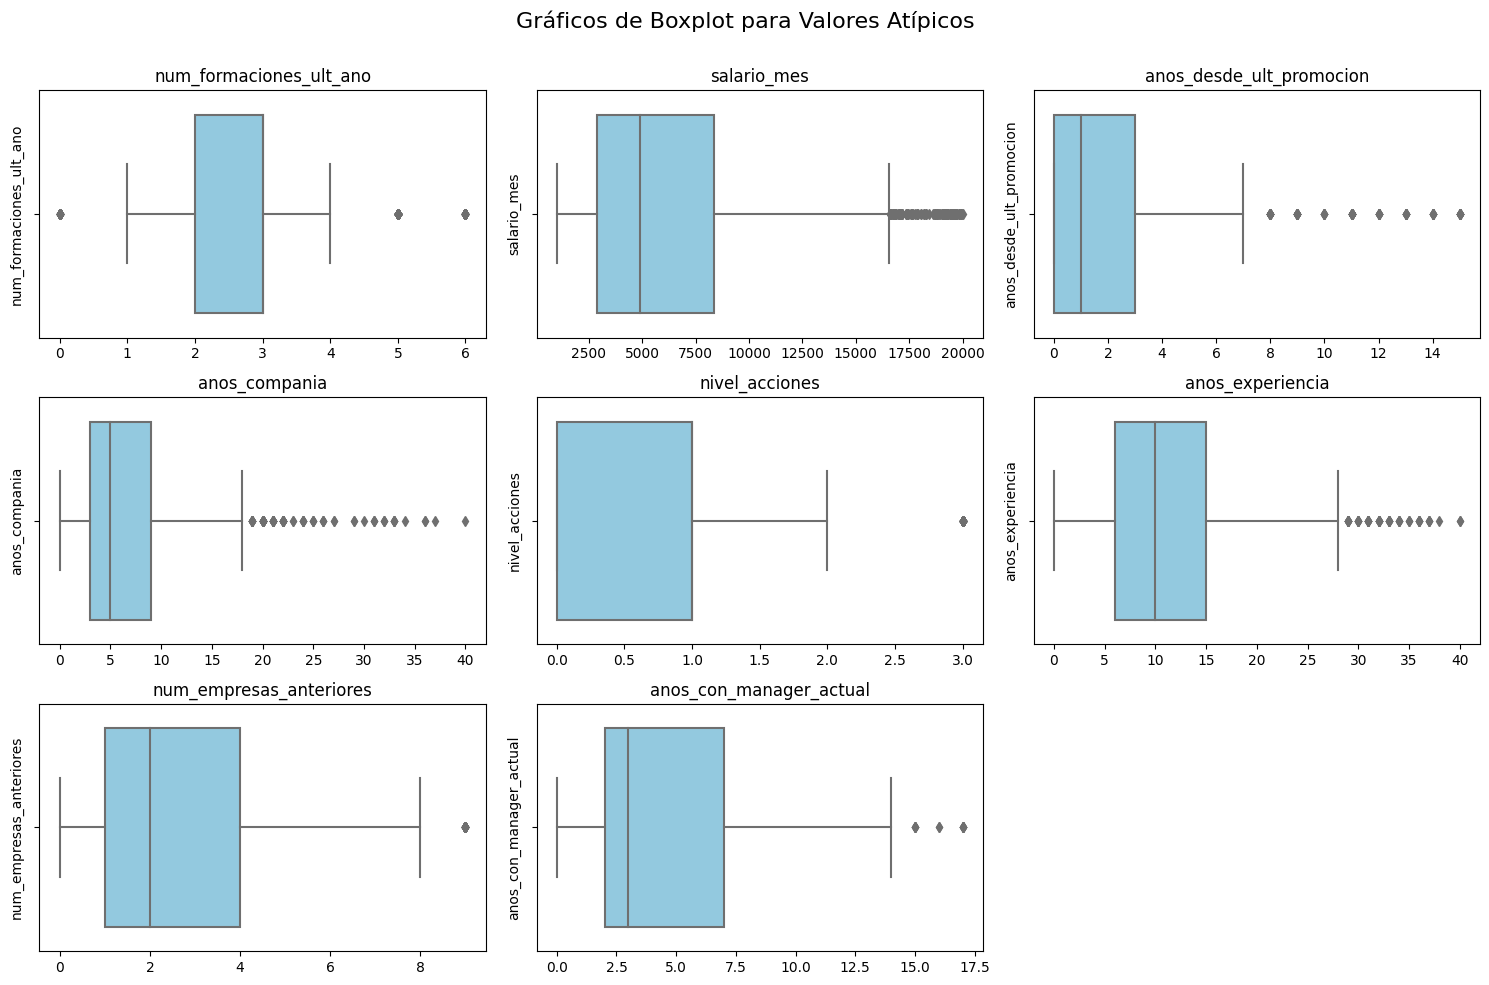

In [63]:
# Lista de columnas para analizar
columnas = ['num_formaciones_ult_ano', 'salario_mes', 'anos_desde_ult_promocion',
            'anos_compania', 'nivel_acciones', 'anos_experiencia',
            'num_empresas_anteriores', 'anos_con_manager_actual']

# Creación de gráficos de boxplot para visualizar los valores atípicos
plt.figure(figsize=(15, 10))

# Configuración de subplots
rows = 3
cols = 3

for i, col in enumerate(columnas):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue', orient='vertical')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel(col)

# Añadimos un título principal
plt.suptitle('Gráficos de Boxplot para Valores Atípicos', fontsize=16)

# Ajustamos el diseño y mostramos los gráficos
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

* num_formaciones_ult_ano:

**Estrategia**: Conservar los valores atípicos.
**Razón**: La alta cantidad de formaciones puede ser indicativa de roles que requieren desarrollo constante o políticas activas de capacitación. Estos valores atípicos podrían ser relevantes para el análisis.

* salario_mes:

**Estrategia**: Conservar los valores atípicos.
**Razón**: Los altos salarios pueden ser normales para roles ejecutivos o especializados. Se verificó estos datos para asegurar su exactitud y luego conservarlos, ya que reflejan la estructura salarial real de la empresa.

* anos_desde_ult_promocion:

**Estrategia**: Conservar los valores atípicos.
**Razón**: Un largo período sin promoción puede ser común en ciertas posiciones o indicar problemas de movilidad interna. Estos datos son importantes para el análisis de la carrera profesional dentro de la empresa.

* anos_compania:

**Estrategia**: Conservar los valores atípicos.
**Razón**: Los empleados con larga antigüedad pueden indicar lealtad o falta de oportunidades de crecimiento. Esta información es valiosa para entender la retención y la cultura corporativa.

* nivel_acciones:

**Estrategia**: Conservar, tras verificar coherencia con el rol.
**Razón**: Altos niveles de acciones pueden ser típicos en empleados de alto rango o con mucha antigüedad. Es importante asegurar que estos valores son coherentes con la posición y la antigüedad del empleado.

* anos_experiencia:

**Estrategia**: Conservar los valores atípicos.
**Razón**: Una alta experiencia es plausible y puede ser un factor importante en el análisis de la dinámica laboral, especialmente en roles de alta calificación.

* num_empresas_anteriores:

**Estrategia**: Conservar los valores atípicos.
**Razón**: Un alto número de empresas previas puede indicar una carrera diversa o inestabilidad laboral. Estos datos son relevantes para análisis relacionados con la retención y el abandono.

* anos_con_manager_actual:

**Estrategia**: Conservar los valores atípicos, a menos que sean inverosímiles.
**Razón**: Largas duraciones con el mismo manager pueden indicar relaciones laborales estables. Es importante verificar la plausibilidad de estos datos.

In [70]:
# Verificación de la plausibilidad de estos datos / anos_con_manager_actual

dafr = df  # Reemplaza 'dataset' con el nombre de tu DataFrame si es diferente

# Cálculo de Q1, Q3 e IQR para la columna 'anos_con_manager_actual'
Q1 = df['anos_con_manager_actual'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['anos_con_manager_actual'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartil (IQR)

# Revisión de cada valor atípico comparado con la antigüedad total en la empresa
for index, row in outliers.iterrows():
    # Obtener la antigüedad total en la empresa
    antiguedad_empresa = df.loc[index, 'anos_compania']

    # Obtener la antigüedad con el manager actual para el valor atípico
    anos_con_manager = row['anos_con_manager_actual']

    # Comprobar si la antigüedad con el manager actual es mayor que la antigüedad total en la empresa
    if anos_con_manager > antiguedad_empresa:
        # Imprimir un mensaje de inconsistencia si se cumple la condición
        print(f"Inconsistencia encontrada en el índice {index}: Años con manager actual ({anos_con_manager}) es mayor que la antigüedad en la empresa ({antiguedad_empresa}).")


El codigo anterior nos indica que no se encontraron inconsistencias en la comparación de los años con el manager actual (anos_con_manager_actual) y la antigüedad total en la empresa (anos_compania). En términos de esta verificación específica, esto es una buena señal y sugiere lo siguiente:

Plausibilidad de los Datos: Los valores atípicos en la columna anos_con_manager_actual son plausibles en el contexto de la antigüedad total de los empleados en la empresa.

Sugiere que los registros de antigüedad y los años con el manager actual están bien mantenidos y no hay errores evidentes como tener más años con un manager que la antigüedad total en la empresa.

# 3. Manejo de Valores Faltantes (Nulos):

In [71]:
# Calculamos la cantidad de valores nulos en cada columna del DataFrame
suma_faltantes = df.isnull().sum()

# Calculamos el porcentaje de valores nulos en cada columna con respecto al total de filas en el Dataframe
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100

# Creamos un nuevo DataFrame 'info_faltantes' con dos columnas: 'Valores Faltantes' y 'Porcentaje de Faltantes'
info_faltantes = pd.DataFrame({'Valores Faltantes': suma_faltantes, 'Porcentaje Faltantes': porcentaje_faltantes})

# Ordenamos 'info_faltantes' en orden descendente (mayor a menor) basado en la columna 'Valores Faltantes'
info_faltantes.sort_values(by='Valores Faltantes', ascending=False).head(10)

,Valores Faltantes,Porcentaje Faltantes
anos_en_puesto,1238,84.217687
conciliacion,1011,68.775510
sexo,199,13.537415
educacion,101,6.870748
satisfaccion_trabajo,76,5.170068
implicacion,18,1.224490
edad,0,0.000000
nivel_acciones,0,0.000000
evaluacion,0,0.000000
satisfaccion_companeros,0,0.000000


**anos_en_puesto (84.22% faltantes):**

* **Análisis**: Una proporción tan alta de datos faltantes hace que esta variable sea poco fiable para cualquier análisis serio.
* **Estrategia**: Eliminar esta columna, ya que imputar más del 80% de los datos puede introducir un sesgo considerable y distorsionar los resultados del análisis.

**conciliacion** (68.78% faltantes):

* Análisis: Similar a anos_en_puesto, una gran cantidad de datos faltantes pone en duda la utilidad de esta variable.
* Estrategia: Puede ser preferible eliminar esta columna. Si es crucial para el análisis, considera investigar la razón de tantos datos faltantes y si es posible recuperarlos.

**sexo** (13.54% faltantes):

* Análisis: Un porcentaje moderado de datos faltantes. Es importante en análisis relacionados con la diversidad y equidad de género.
* Estrategia: Se Considera imputar estos valores faltantes basándote en la distribución de los datos existentes.

**educacion** (6.87% faltantes):

* Análisis: Una proporción manejable de datos faltantes. La educación puede ser importante para entender la composición del capital humano.
* Estrategia: Imputa estos valores faltantes basándote en la moda (el valor más frecuente)

**satisfaccion_trabajo** (5.17% faltantes):

* Análisis: Un porcentaje relativamente bajo de datos faltantes. Esta variable puede ser importante para análisis de clima laboral o retención de empleados.
* Estrategia: Imputar los valores faltantes, utilizando la moda.

**implicacion** (1.22% faltantes):

* Análisis: Muy pocos datos faltantes. Esta variable puede ser relevante para evaluar el compromiso y la productividad.
* Estrategia: Imputar los valores faltantes usando la moda.

In [ ]:
# Eliminar columnas con un alto porcentaje de valores faltantes

df.drop(columns=['anos_en_puesto', 'conciliacion'], inplace=True)

## 3.1 EDA de variables Categóricas

**Antes de decidir las estrategias de los valores faltantes, se realiza un análisis de la distribución de las variables categóricas**

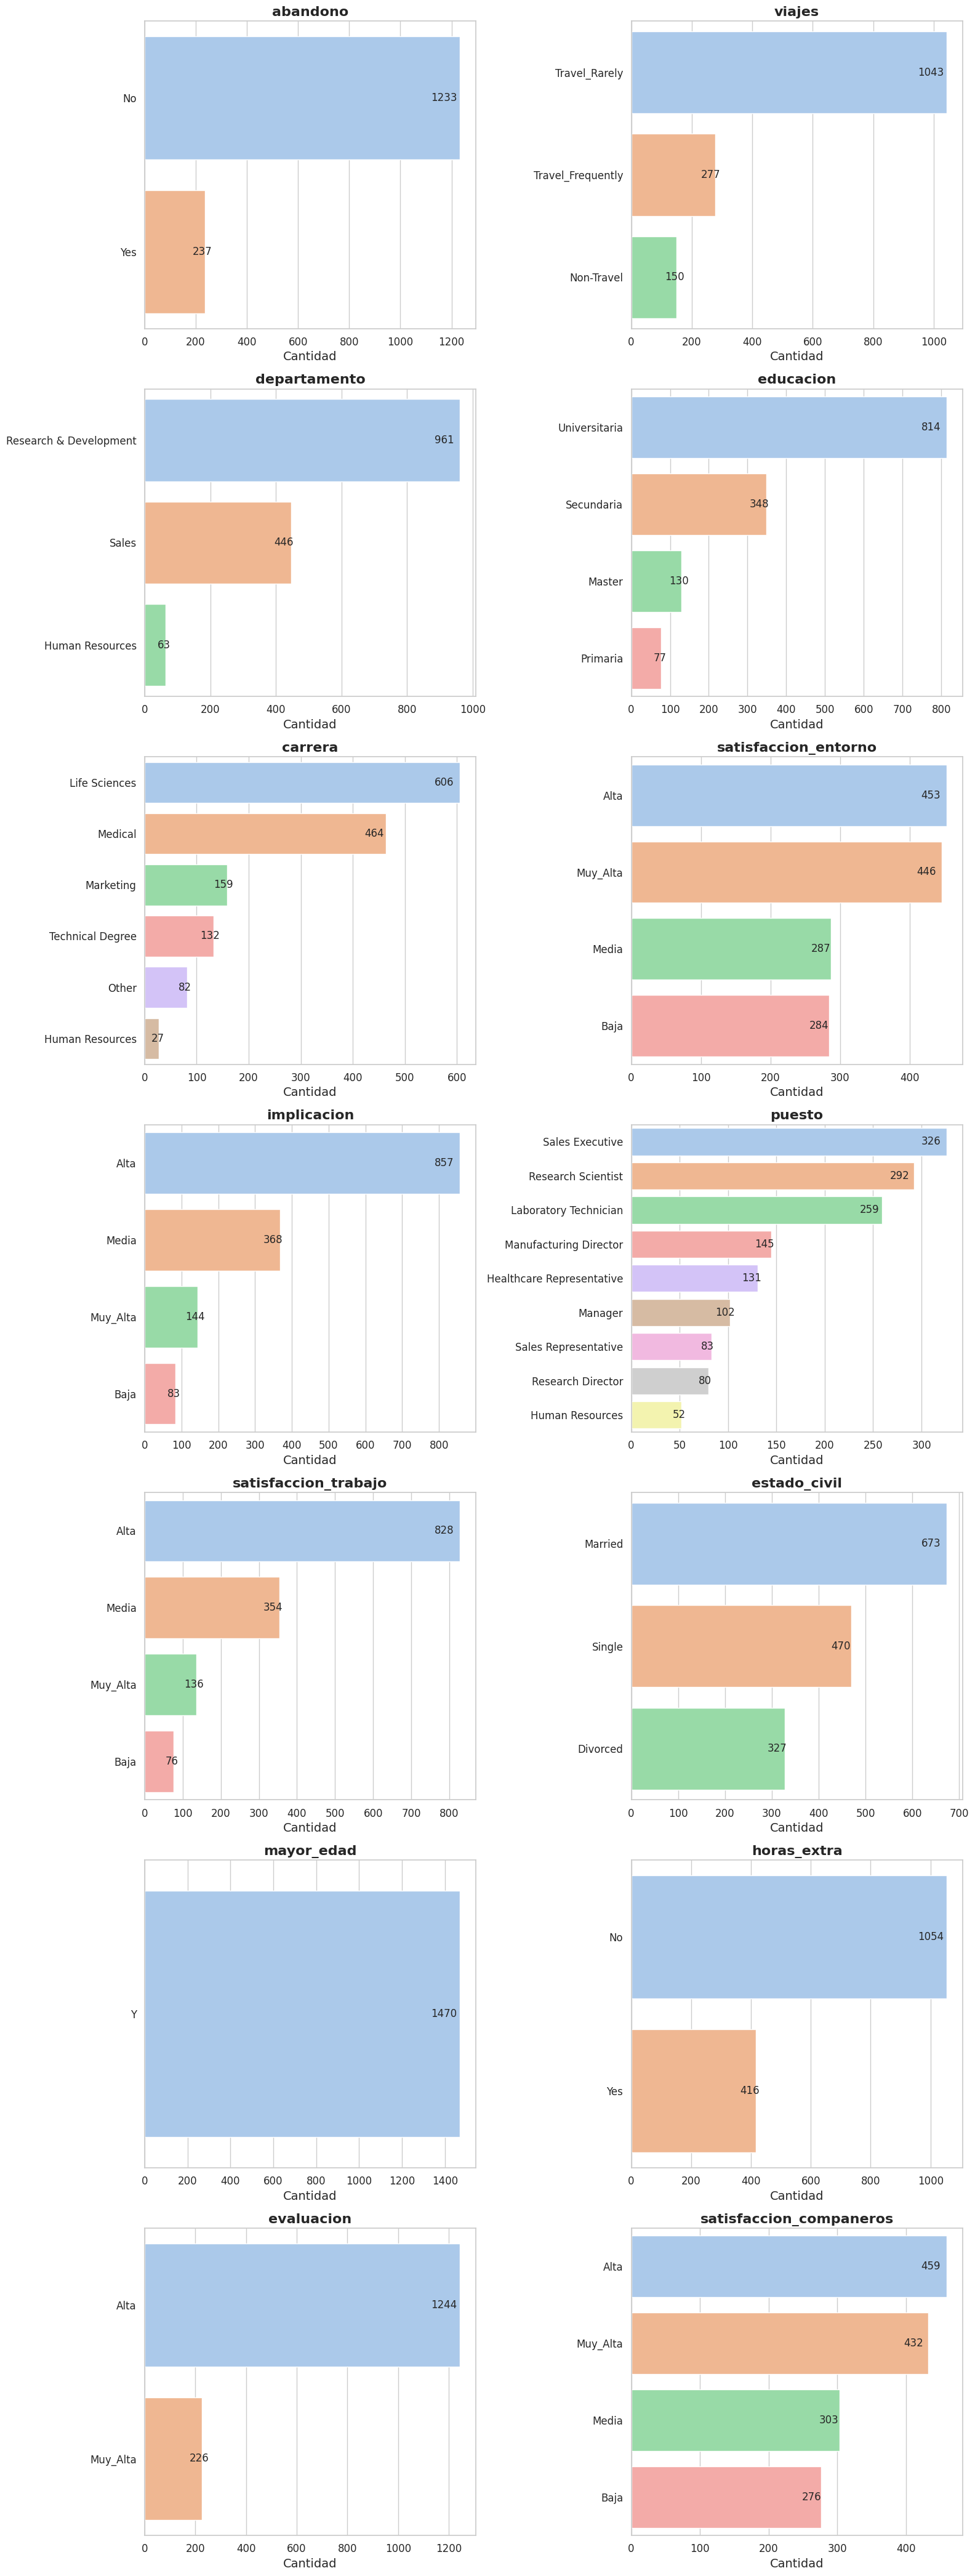

In [89]:
def graficos_eda_categoricos(cat):
    # Establecemos un estilo de fondo blanco con rejilla para una mejor legibilidad
    sns.set(style="whitegrid", palette="pastel")

    # Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)

    # Creamos la figura con el número adecuado de subplots
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))
    # Si filas es 1, ax será un array 1D, lo aplanamos para poder iterar
    ax = ax.flat if filas > 1 else [ax]

    # Iteramos sobre cada columna y creamos un gráfico de barras horizontal
    for cada, variable in enumerate(cat):
        # Obtenemos los conteos de cada categoría
        value_counts = cat[variable].value_counts()
        # Creamos el gráfico de barras horizontal
        sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax[cada])
        # Configuramos el título y los parámetros de los ejes
        ax[cada].set_title(variable, fontsize=16, fontweight='bold')
        ax[cada].set_xlabel('Cantidad', fontsize=14)
        ax[cada].set_ylabel('')
        ax[cada].tick_params(labelsize=12)
        # Añadimos las etiquetas de valores para cada barra
        for p in ax[cada].patches:
            width = p.get_width()
            ax[cada].text(width - (width*0.05), p.get_y() + p.get_height() / 2,
                          int(width), ha='center', va='center', fontsize=12)

    # Ajustamos el layout para evitar la superposición y mejorar la legibilidad
    plt.tight_layout()
    plt.show()

graficos_eda_categoricos(df.select_dtypes(include=['category', 'object']))

**abandono**:

La mayoría de los empleados no han abandonado la empresa.

**viajes**:

La mayoría de los empleados viajan raramente, lo que sugiere que los viajes no son una parte común de la mayoría de los roles o que la empresa podría tener una política de viajes restringida.

**departamento**:

La mayor parte de la fuerza laboral parece estar en 'Research & Development' seguido por 'Sales', lo que indica una estructura empresarial centrada en la innovación y la venta de productos/servicios.

**educacion**:

'Universitaria' es el nivel de educación más común, lo que sugiere que la empresa valora un alto nivel de educación formal para sus empleados.

**carrera**:

'Life Sciences' y 'Medical' son las áreas de carrera más comunes, lo que puede reflejar la naturaleza de la empresa o la industria en la que opera.

**satisfaccion_entorno:**

Las respuestas parecen estar bastante equilibradas, con una ligera inclinación hacia 'Alta' y 'Muy Alta', lo que podría indicar un ambiente de trabajo generalmente positivo.

**implicacion:**

Un gran número de empleados tienen un nivel de implicación 'Alta', lo que puede correlacionarse con la satisfacción general y la productividad.

**puesto:**

Los puestos de 'Sales Executive' y 'Research Scientist' son los más comunes, lo que está en línea con los departamentos más grandes y sugiere roles clave dentro de la organización.

**satisfaccion_trabajo:**

La mayoría indica una satisfacción 'Alta', lo que es un indicador positivo para la moral de los empleados.

**estado_civil:**

'Married' es el estado civil más común, seguido de 'Single' y 'Divorced'. Esto podría ser relevante para la comprensión de las dinámicas sociales y las necesidades de la fuerza laboral.

**mayor_edad:** "Eliminar"

Todos los empleados son mayores de edad, lo que es de esperar en un entorno laboral.

**horas_extra:**

La mayoría no trabaja horas extras, lo que podría reflejar la cultura laboral o las políticas de equilibrio entre trabajo y vida personal.

**evaluacion:**

La mayoría tiene una evaluación 'Alta', lo que podría indicar una tendencia general positiva en las evaluaciones de desempeño o **posiblemente una falta de diferenciación en la evaluación del desempeño**.

**satisfaccion_companeros:**

Similar a la satisfacción con el trabajo y el entorno, la satisfacción con los compañeros de trabajo también es alta, lo que apunta a un clima laboral positivo.

**Distribución de sexo:**

Parece haber una clara dominancia de una categoría sobre las otras, lo que podría indicar una desigualdad de género en la población de estudio. Esto podría ser relevante para discusiones sobre diversidad y políticas de inclusión en la empresa.

**Distribución de educacion:**

La mayoría de los individuos tienen un nivel de educación 'Universitaria', seguido por 'Secundaria', con 'Master' y 'Primaria' siendo menos comunes. Esto sugiere que la fuerza laboral tiene un nivel de educación relativamente alto. La empresa podría estar requiriendo o valorando altamente la educación formal para sus puestos.

**Distribución de satisfaccion_trabajo:**

La categoría 'Alta' es la más prevalente en satisfacción laboral, lo que indica una tendencia general positiva hacia el trabajo en la organización. Es importante considerar cómo esta satisfacción puede correlacionarse con otros factores como el rendimiento, la implicación y la retención.

**Distribución de implicacion:**

Al igual que con la satisfacción laboral, hay una tendencia hacia una alta implicación. Esto es positivo ya que sugiere que los empleados están generalmente comprometidos con su trabajo. Una implicación alta podría estar relacionada con una mayor productividad y menor rotación.

**Nota:** La elección de la moda para la imputación de datos faltantes, especialmente en variables categóricas, se basa en varias consideraciones importantes:
* Mantenimiento de la Distribución Original:

La moda, al ser el valor más frecuente, ayuda a mantener la distribución original de los datos. Al imputar la moda, se altera mínimamente la proporción de las categorías en la variable, lo que puede ser crucial para no sesgar los análisis posteriores.
Aplicabilidad a Datos Categóricos:

* Para datos categóricos, las medidas de tendencia central como la media o la mediana a menudo no son aplicables o no tienen sentido. La moda es la única medida de tendencia central que puede aplicarse tanto a datos numéricos como categóricos.

In [90]:
# Imputación de la moda para 'educacion'

moda_educacion = df['educacion'].mode()[0]
df['educacion'].fillna(moda_educacion, inplace=True)

*La educación es típicamente una variable categórica con categorías como 'Secundaria', 'Universitaria', 'Master', etc. Utilizar la moda asegura que los datos imputados reflejen el nivel de educación más común en la organización, manteniendo la coherencia y relevancia de la variable.*

In [91]:
# Imputación de la moda para 'satisfaccion_trabajo'

moda_satisfaccion = df['satisfaccion_trabajo'].mode()[0]
df['satisfaccion_trabajo'].fillna(moda_satisfaccion, inplace=True)

*Si la satisfacción laboral se mide en categorías (por ejemplo, 'Alta', 'Media', 'Baja'), la moda es adecuada para mantener la categoría predominante en la fuerza laboral. Imputar la categoría más frecuente ayuda a preservar la distribución original de la satisfacción entre los empleados.*

In [92]:
# Imputación de la moda para 'implicacion'

moda_implicacion = df['implicacion'].mode()[0]
df['implicacion'].fillna(moda_implicacion, inplace=True)

*Similar a la satisfacción laboral, si la implicación se categoriza, la moda ayuda a mantener la tendencia general en la implicación del empleado. Es especialmente útil en escenarios donde hay una categoría claramente dominante, lo cual es común en variables como implicación o compromiso.*

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1470 non-null   float64
 10  implicacion               1470 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1470 non-null   object 
 14  estado_c

## 3.2 EDA de variables Numéricas

In [105]:
def estadisticos_cont (num):

  estadisticos = num.describe().T

  estadisticos['median'] = num.median()

  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

  return(estadisticos)


In [103]:
 estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1470.0,2.764626,3.0,0.676636,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


**Analisis:**

Empleados y horas_quincena, solo tienen un valor, *se eliminara*

**sexo:**

La media está más cerca de 3, lo que podría sugerir que hay más registros de un género en particular si se codifica como 1, 2, 3, etc. Sin embargo, no sabemos porque hay 4, *se elimianara*.

**edad:**

El promedio de edad es de aproximadamente 37 años, con una desviación estándar de aproximadamente 9 años. Esto sugiere que la fuerza laboral tiene una buena mezcla de empleados jóvenes y experimentados. La edad mínima es de 18 y la máxima de 60, lo que indica una amplia gama de generaciones en la empresa.

**distancia_casa:**

En promedio, los empleados viven a 9.19 km de su lugar de trabajo, pero con una mediana de 7 km, lo que indica que la mayoría vive más cerca, y hay algunos valores más altos que aumentan el promedio.

**nivel_laboral:**

Los valores varían de 1 a 5, lo que sugiere 5 niveles de jerarquía o posición dentro de la empresa. La distribución es ligeramente sesgada hacia los niveles inferiores, lo que es común en muchas estructuras organizativas.

**salario_mes:**

Hay una amplia gama de salarios, con una desviación estándar casi igual a la media, lo que indica una gran variabilidad. Esto podría reflejar diferentes roles, niveles de experiencia y responsabilidades dentro de la empresa.

**num_empresas_anteriores:**

La media es cercana a 3 con una desviación estándar de 2.5, lo que indica que los empleados han trabajado en varias empresas antes. Esto podría sugerir una fuerza laboral con diversidad de experiencias.
incremento_salario_porc:

El aumento de salario promedio es del 15%, con una desviación estándar relativamente pequeña, lo que indica que los aumentos de salario son bastante uniformes en toda la empresa.

**nivel_acciones:**

El promedio de nivel de acciones es de 0.79 con una desviación estándar cercana a 1, lo que indica que algunos empleados tienen acciones y otros no.

**anos_experiencia:**

Los empleados tienen en promedio 11 años de experiencia, con una amplia gama que va de 0 a 40 años. Esto muestra que la empresa cuenta con empleados novatos así como con veteranos.
num_formaciones_ult_ano:

En promedio, los empleados han asistido a casi 3 formaciones en el último año, lo que sugiere una inversión en la formación y el desarrollo del personal.

**anos_compania:**

Los empleados han estado con la empresa en promedio 7 años, pero con una amplia variabilidad. Algunos empleados son nuevos, mientras que otros tienen hasta 40 años de servicio.

**anos_desde_ult_promocion y anos_con_manager_actual:**

Estas variables muestran cuánto tiempo ha pasado desde la última promoción de un empleado y cuánto tiempo han trabajado con su manager actual. Ambas tienen una variabilidad considerable, lo que puede reflejar trayectorias profesionales diversas dentro de la empresa.

In [ ]:
df.drop(columns=['empleados', 'sexo', 'horas_quincena'], inplace=True)

In [110]:
df. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores 